In [0]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline 

In [0]:
#Derive the id from the google drive shareable link.
#For the file at hand the link is as below
#https://drive.google.com/file/d/1JvX4vzhhCSoVhvHTffjQveUfv_NbAj74/view?usp=sharing
file_id='11tK2YkZxCfVB68_KlblSIOc8P9ZNRwwX'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
#The final url would be as below:-
#csv_url='https://drive.google.com/uc?export=download&id=1-tjNjMP6w0RUV4GhJWw08ql3wYwsNU69'
df = pd.read_csv(csv_url, na_values = '')

In [0]:
def clusterInfo(model):
    print("Cluster Analysis Inertia: ", model.inertia_)
    print('------------------------------------------')
    
    for i in range(len(model.cluster_centers_)):
        print("\n  Cluster ", i)
        print("    Centroid ", model.cluster_centers_[i])
        print("    #Samples ", (model.labels_==i).sum()) # NumPy Power

In [0]:
# Find the cluster with the least # attached nodes
def cluster_samples(user_kmean):
    
    cluster_list = []
    
    # iterate over each centroid indices (k)
    for i in range(len(user_kmean.cluster_centers_)):    
        
        #while all calls from single caller exceed centroid's (k(i)) calls 
        if len(user_kmean.labels_) > (user_kmean.labels_== i ).sum(): 
            
            #append sum of calls from centroid 
            cluster_list.append((user_kmean.labels_== i ).sum())                          
    
    #convert list to bnp.array for faster manipulation
    cluster_array = np.array(cluster_list)
    
    # isolate from model only labels associated with cenroid of fewest samples (calls)
    return (np.argmin(cluster_array), np.argmax(cluster_array))

### CDRs
A call detail record (CDR) is a data record produced by a telephone exchange or other telecommunications equipment that documents the details of a telephone call or other telecommunications transaction (e.g., text message) that passes through that facility or device.

The record contains various attributes of the call, such as time, duration, completion status, source number, and destination number. It is the automated equivalent of the paper toll tickets that were written and timed by operators for long-distance calls in a manual telephone exchange.

The dataset curated contains call records for 10 people tracked over the course of 3 years. This experiment seeks to determine the geolocations where these people likely live and work. 

In [0]:
# Convert the date using pd.to_datetime, and the time using pd.to_timedelta for future Boolean comparison

df['CallDate'] = pd.to_datetime(df['CallDate'])
df['CallTime'] = pd.to_timedelta(df['CallTime'])
df['Duration'] = pd.to_timedelta(df['Duration'])

_updated with better technique_<br>
Create a unique list of the mobile phone numbers stored in the _In_ column of the dataset, and save them in a regular python list called unique_numbers. Manually check through unique_numbers to ensure the order the numbers appear is the same order they (uniquely) appear in the dataset:

In [0]:
# Create a unique list of the phone-number values (users) stored in the
# "In" column of the dataset, and saves it to a variable called `distinct_callers`.

# distinct_callers = df['In'].unique().tolist()

In [7]:
# Creates a unique NDArray of the phone-number values stored in the
# "In" column of the dataset, and saves it to a variable called `distinct_callers`.
distinct_callers = df['In'].unique()

user1 = df[(df['In'] == distinct_callers[0])]
user2 = df[(df['In'] == distinct_callers[1])]
user3 = df[(df['In'] == distinct_callers[2])]
user4 = df[(df['In'] == distinct_callers[3])]
user5 = df[(df['In'] == distinct_callers[4])]
user6 = df[(df['In'] == distinct_callers[5])]
user7 = df[(df['In'] == distinct_callers[6])]
user8 = df[(df['In'] == distinct_callers[7])]
user9 = df[(df['In'] == distinct_callers[8])]
user10 = df[(df['In'] == distinct_callers[9])]

# confirm 10 callers
distinct_callers

array([4638472273, 1559410755, 4931532174, 2419930464, 1884182865,
       3688089071, 4555003213, 2068627935, 2894365987, 8549533077])

Text(36.1545,0.5,'Lat')

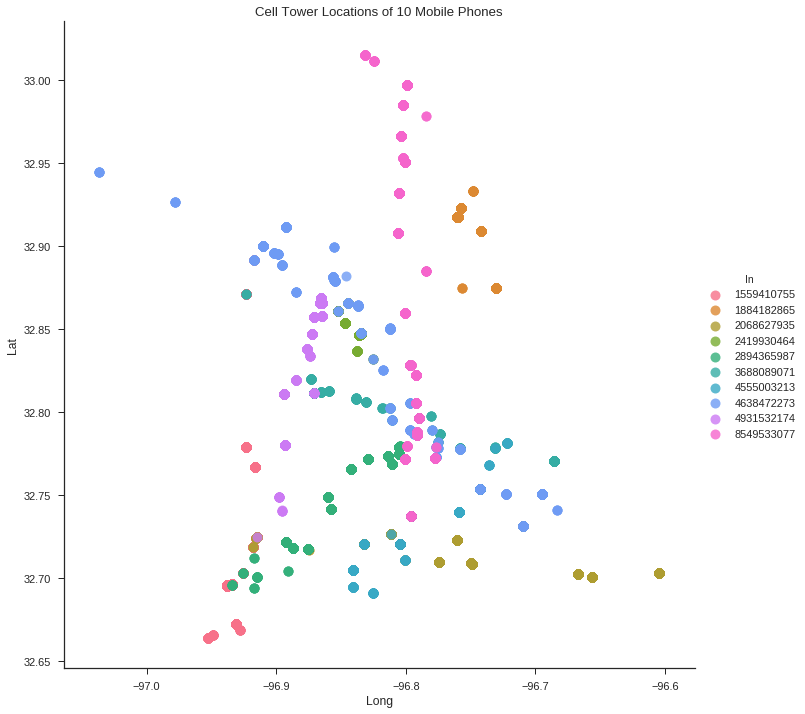

In [8]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('TowerLon', # Horizontal axis
           'TowerLat', # Vertical axis
           data = df, # Data source
           fit_reg = False, # Don't fix a regression line
           hue="In", # Set color
           scatter_kws = {"marker": "D", # Set marker style
                        "s": 100},# S marker size
           size = 10, # Height (in inches) of each facet
           aspect = 1) # Aspect ratio of each facet, so that aspect * size gives the width of each facet in inches

# Set title
plt.title('Cell Tower Locations of 10 Mobile Phones')

# Set x-axis label
plt.xlabel('Long')

# Set y-axis label
plt.ylabel('Lat')


Using some domain expertise,  intuition should suggest that people are likely to behave differently on weekends vs on weekdays:

__On Weekends__
People probably don't go into work
They probably sleep in late on Saturday
They probably run a bunch of random errands, since they couldn't during the week
They should be home, at least during the very late hours, e.g. 1-4 AM

__On Weekdays__
People probably are at work during normal working hours
They probably are at home in the early morning and during the late night
They probably spend time commuting between work and home everyday

## Residence Location

### Weekend

In [0]:
# create df from slice that includes only weekends (sat/sun).
weekend_calls = user1[(user1.DOW == 'Sat') | (user1.DOW == 'Sun')]

Text(36.1247,0.5,'Lat')

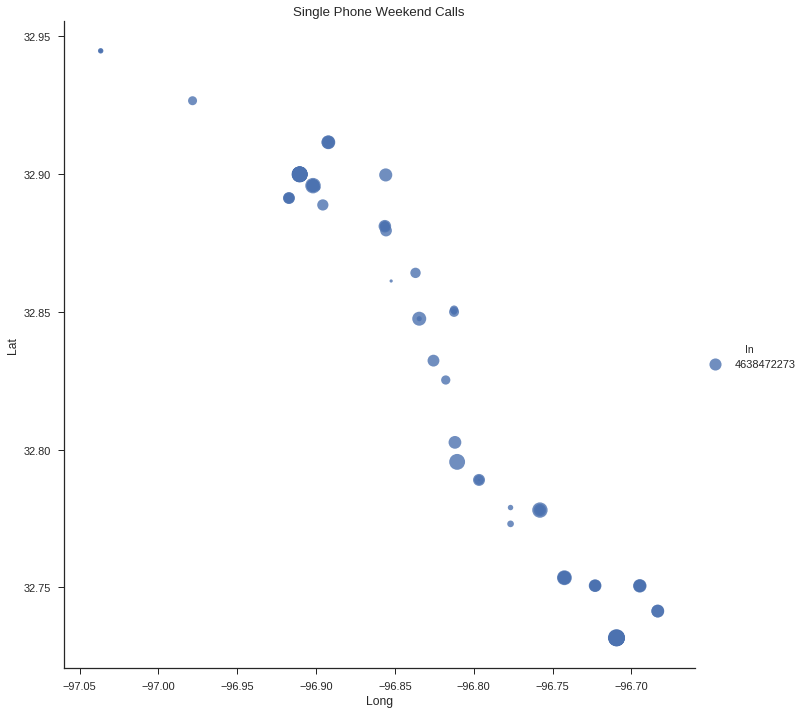

In [10]:
  # proportion of single call duration compared to mean
size = 100 * (weekend_calls.Duration / weekend_calls.Duration.mean())

# Set style of scatterplot

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x = 'TowerLon', # Horizontal axis
           y = 'TowerLat', # Vertical axis
           data = weekend_calls, # Data source
           fit_reg = False, # Don't fix a regression line
           hue = "In", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": size},# S marker size
           size = 10, # Height (in inches) of each facet
           legend = 'Call Duration',
           aspect = 1) # Aspect ratio of each facet, so that aspect * size gives the width of each facet in inches

# Set title
plt.title('Single Phone Weekend Calls')

# Set x-axis label
plt.xlabel('Long')

# Set y-axis label
plt.ylabel('Lat')

### Twilight Hours

Assuming user sleeps from midnight to 0600 on weekends, filter df down for calls that came in either before 6AM OR after midnight. 

In [0]:
# Create df from slice that includes only calls between midnight and 0600 on weekends
twilight_weekends = weekend_calls[(weekend_calls.CallTime < "06:00:00") | (weekend_calls.CallTime > "24:00:00")]

Text(36.9805,0.5,'Lat')

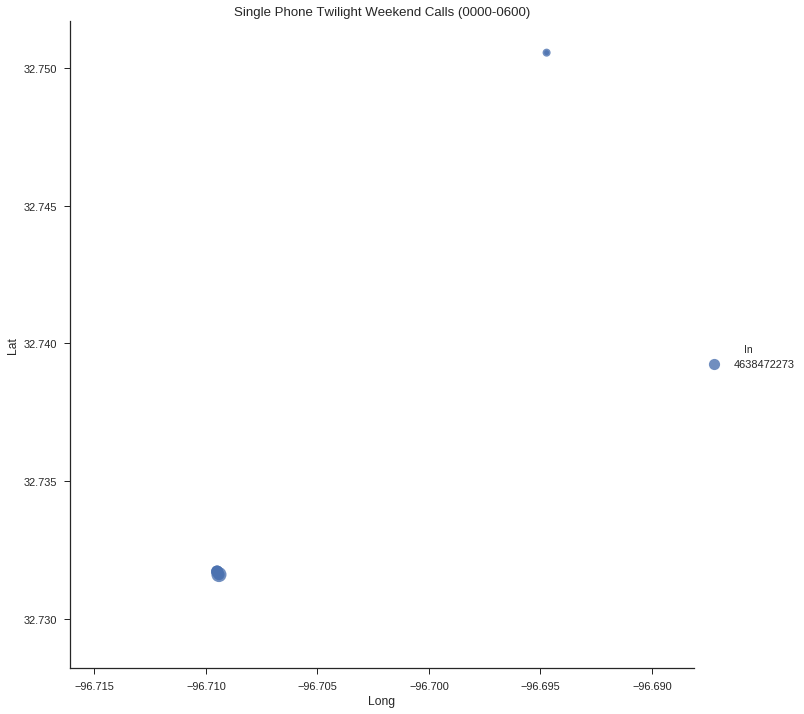

In [12]:
# proportion of single call duration compared to mean
twilight_weekends_size = 100 * (twilight_weekends.Duration / twilight_weekends.Duration.mean())

# Set style of scatterplot

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x = 'TowerLon', # Horizontal axis
           y = 'TowerLat', # Vertical axis
           data = twilight_weekends, # Data source
           fit_reg = False, # Don't fix a regression line
           hue = 'In', # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": twilight_weekends_size},# S marker size
           size = 10, # Height (in inches) of each facet
           legend = 'Call Duration',
           aspect = 1) # Aspect ratio of each facet, so that aspect * size gives the width of each facet in inches

# Set title
plt.title('Single Phone Twilight Weekend Calls (0000-0600)')

# Set x-axis label
plt.xlabel('Long')

# Set y-axis label
plt.ylabel('Lat')

[Domocile Tower](https://drive.google.com/open?id=17-iGaKX0WXYaIMl-8oWrbn-dkbMIH7l0)

In [13]:
twilight_weekends['TowerLon'].value_counts()

-96.709500    6
-96.709417    5
-96.694722    2
Name: TowerLon, dtype: int64

twilight_weekends['TowerLat'].value_counts()

32.731722    6<br>
32.731611    5<br>
32.750556    2<br>

twilight_weekends['TowerLon'].value_counts()

-96.709500    6<br>
-96.709417    5<br>
-96.694722    2<br>


### Work Location
  1. Workplace is identified by weekday calls placed before 5pm. 
  2. Before 0730, the user is probably sleeping and won't call / wake up to take a call. 
  3. There should be a brief time in the morning marked by commute to work, then they'll spend the entire day at work.

In [0]:
# eliminate weekend calls
weekday_calls = user1[(user1.DOW != 'Sat') & (user1.DOW != 'Sun')]

# eliminate calls before 0730 and after 1700
weekday_five = weekday_calls[(weekday_calls.CallTime > '07:30:00') & (weekday_calls.CallTime < '17:00:00')]

Observation: user1 made 1098 calls between 0730 and 1700 during the week over the course of three years from Christmas 2010.
`weekday_five['DOW'].value_counts()`
     >Fri    231
    Tue    228
    Wed    222
    Thr    209
    Mon    208


Text(36.1247,0.5,'Lat')

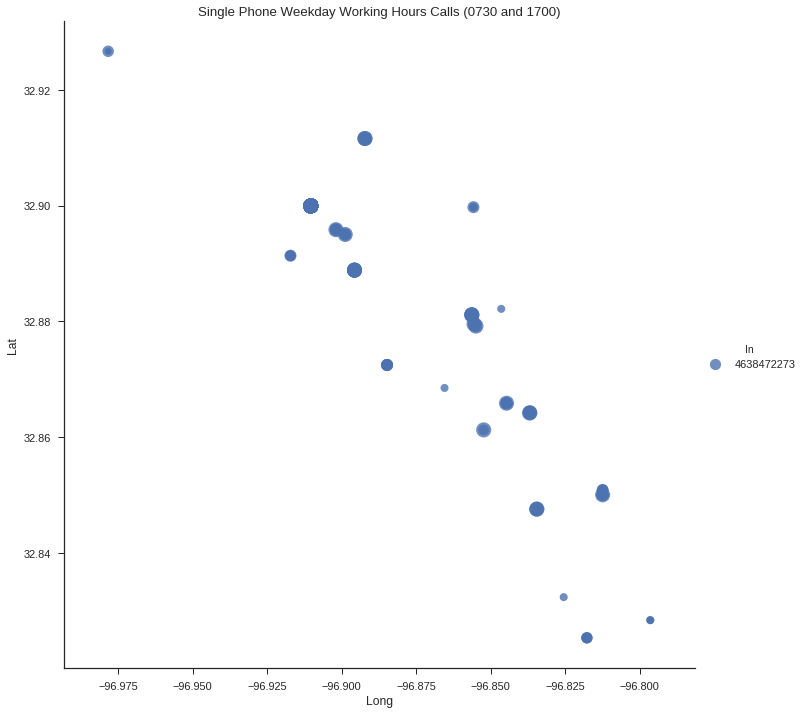

In [15]:
# proportion of single call duration compared to mean
weekday_five_size = 100 * (weekday_five.Duration / weekday_five.Duration.mean())

# Set style of scatterplot

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x = 'TowerLon', # Horizontal axis
           y = 'TowerLat', # Vertical axis
           data = weekday_five, # Data source
           fit_reg = False, # Don't fix a regression line
           hue = 'In', # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": twilight_weekends_size},# S marker size
           size = 10, # Height (in inches) of each facet
           legend = 'Call Duration',
           aspect = 1) # Aspect ratio of each facet, so that aspect * size gives the width of each facet in inches

# Set title
plt.title('Single Phone Weekday Working Hours Calls (0730 and 1700)')

# Set x-axis label
plt.xlabel('Long')

# Set y-axis label
plt.ylabel('Lat')

## Clustering

Clustering groups samples that are similar within the same cluster. The more similar the samples belonging to a cluster group are (and conversely, the more dissimilar samples in separate groups), the better the more performant the clustering algorithm. Since clustering is an unsupervised algorithm, this similarity metric must be measured automatically and based solely on the observed data.

The implementation details and definition of similarity are what differentiate the many clustering algorithms. K-Means iteratively separates  samples into a user-specified number of "K" cluster groups of roughly equal variance. Cluster groups are defined by their geometric cluster center, single point referred to as its centroid. Separately, centroid and cluster are sometimes used interchangeably; but if used together, a cluster is a set of similar samples, and a centroid is just the mean feature-position of all samples assigned to the cluster.

The centroids are not records in the dataset, however they do 'exist' within the dataset's feature-space. This permits calculation of a meaningful distance measure between the centroids and samples. Every sample in the dataset is assigned to the nearest centroid; so a sample that is 10 units away from CusterA's centroid, and 100 units away from ClusterB's, is assigned to ClusterA.

In the case of continuous features, calculating the distance is straightforward. But categorical features require creative methods. SciKit-Learn's K-Means implementation only natively supports numeric features types, so dummies will have to be applied manually.  

Clustering is a natural action we do even as children, by arranging similar shaped blocks and colors. K-Means clustering is best suited when you have a good idea of the number of distinct clusters your unlabeled dataset should be segmented into. Generally, the output of K-Means is used in two ways. To separate your unlabeled data into K groups, which is the clear use case, or to find and use the resulting centroids.

#### Separate  Data
Astronomers use clustering to group different star types, classes of planets, and galaxies. Biologists use it to group every living thing by species, genus, and kingdom. In business, clustering is used to segment likely and unlikely prospects, for location assignment, factor endowment, and the assignment and deployment of remote services.

#### Centroid Usage
Besides divvying up samples, clustering can also provide a layer of abstraction, by directing attention to the cluster and its attributes and not each samples. In the climate change case study from the previous module, you saw how climate divisions were used as a cluster abstraction over individual ground stations for various mentioned reasons. Another example of centroid usage would be a company looking for ideal locations to open a limited number of branches, based on the location of their customers.

### The K-Means Algorithm
K-Means starts by placing a user-specified number of "K" cluster centers in the feature space. There are many techniques for choosing the first centroid placement, and results will vary depending on the one selected. The simplest being just use the position of some random samples as the centroids' starting spots.

Each cluster then takes ownership of the samples nearest to its centroid, and every sample can only be assigned as single cluster. 'Nearest' is a value that has to be evaluated. In SciKit-Learn, it is defined as the multivariate, n-dimensional Euclidean distance between the sample and the centroid. After this, the centroid location is updated to be the mean value of all samples assigned to it. This mean value is calculated by feature, so the centroid position ends up being a n-length vector within the feature space.

The assignment and update steps repeat until there are no more changes in either, at which point the algorithm has converged. K-Means always converges, and it is very fast at doing so. But it does not always converge at the global minima.

The technical explanation for what K-Means does is minimizing the within-cluster inertia, or sum of squared errors between each sample and its respective centroid. As mentioned, the initial centroid assignment affects the results. Two runs of K-means might produce different outcomes, but the quality of their cluster assignments are ranked by looking at which run has the smallest overall inertia.

> KMeans(algorithm='auto', <br>
 copy_x=True, <br>
 *init='k-means++',*<br> 
 max_iter=300,<br>
 n_clusters=3, <br>
 n_init=10, <br>
 n_jobs=1, <br>
 precompute_distances='auto',<br>
 random_state=None, <br>
 tol=0.0001, <br>
 verbose=0)




 __do_K_Means()__
 
 function accepts CDR and number of clusters (k).   
 
 Lat and Lon are (approximately) on the same scale, no feature scaling is required. 
 
 function prints the centroid locations and adds them to scatter plot using a distinguishable marker and color.
 
 returns variable model encompassing SKLearn K-Means model

In [0]:
def do_K_Means(data, num_clusters):
      
    lat_long = data[['TowerLat', 'TowerLon']]
    
    # initialize KMeans
    model = KMeans(n_clusters = num_clusters,  init = 'random', n_init=1, algorithm = 'full', random_state = 1)
    
    # fit KMeans model
    model = model.fit(lat_long)
    
    # calculate labels (centroid assingment) for each observation
    labels = model.predict(lat_long)
    
    # calculate k centroid coordinates
    centroids = model.cluster_centers_
    
    # return KMeans model
    return model
    

Execute doKMeans() (K-Means with K = 2+). There really should only be a two areas of concentration. Multiple areas that are "hot" (multiple areas the user spends a lot of time at that are FAR apart from one another), then increase K = 3, with the goal being that all centroids except two will sweep up the annoying outliers and not-home, not-work travel occasions. the other two will zero in on the user's approximate home location and work locations. Or rather the location of the cell tower closest to them.....

### K-Means and Mean Call Time to Infer Work Location 

In [0]:
from sklearn.cluster import KMeans

model = do_K_Means(weekday_five, 2)

In [18]:
clusterInfo(model)

Cluster Analysis Inertia:  0.12687716135662383
------------------------------------------

  Cluster  0
    Centroid  [ 32.89995416 -96.90938375]
    #Samples  958

  Cluster  1
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


Assumptions:
  1. Centroid with the *greatest* number of samples identifies work location.  
  2. Samples belonging to the cenroid with the *least* samples marks transit between home and work. 


Confirm using mean CallTime.  

What time, on average, is the user in between home and work?

In [19]:
least_cluster = cluster_samples(model)[0]

most_cluster = cluster_samples(model)[1]

print("Centroid Index with Least Samples: ", least_cluster)

print("Centroid Index with Most Samples: ", most_cluster)

#label indices of calls from centroid with least samples
least_sample_index_array = np.where(model.labels_ == cluster_samples(model)[0])[0]

#label indices of calls from centroid with most samples
most_sample_index_array = np.where(model.labels_ == cluster_samples(model)[1])[0]

# user weekday calls made between 0730 and 1700 associated with centroid of least samples
least_centroid_samples = weekday_five.loc[weekday_five.index[[least_sample_index_array]], :]

# user weekday calls made between 0730 and 1700 associated with centroid of most samples
most_centroid_samples = weekday_five.loc[weekday_five.index[[most_sample_index_array]], :]

print("Least Samples Centroid's Mean Call Time", least_centroid_samples['CallTime'].mean())

print("Most Samples Centroid's Mean Call Time", most_centroid_samples['CallTime'].mean())

Centroid Index with Least Samples:  1
Centroid Index with Most Samples:  0
Least Samples Centroid's Mean Call Time 0 days 07:49:53.168115
Most Samples Centroid's Mean Call Time 0 days 10:39:26.528001


Observation.  k-means  assists with confirming transit and workplace using mean call time associated with each centroid.

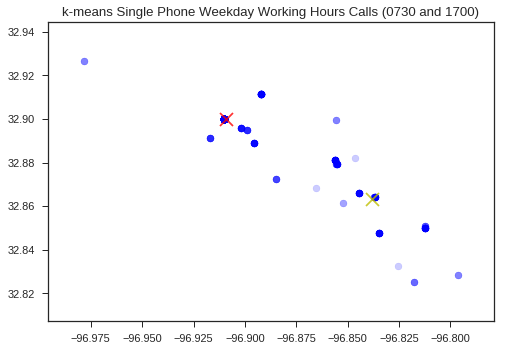

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x = weekday_five.TowerLon, y = weekday_five.TowerLat, c='Blue', marker='o', alpha=0.2)
ax.set_title('k-means Single Phone Weekday Working Hours Calls (0730 and 1700)')


ax.scatter(model.cluster_centers_[0,1], model.cluster_centers_[0,0], s=169, c='r', marker='x', alpha=0.8, linewidths=2)
ax.scatter(model.cluster_centers_[1,1], model.cluster_centers_[1,0], s=169, c='y', marker='x', alpha=0.8, linewidths=2)
#ax.scatter(model.cluster_centers_[2,1], model.cluster_centers_[2,0], s=169, c='b', marker='x', alpha=0.8, linewidths=2)
#ax.scatter(model.cluster_centers_[3,1], model.cluster_centers_[3,0], s=169, c='y', marker='x', alpha=0.8, linewidths=2)




There really should only be a single area of concentration. If multiple 'hot' areas are present, increase K accordingly. The goal being that one of the centroids will sweep up the outliers; and the other will zero in on the user's approximate work location. (or rather the location of the cell tower closest to their work)



Examining phone number:  4638472273  caller:  1
Centroid Index with Least Samples:  1
Centroid Index with Most Samples:  0
Least Samples Centroid's Mean Call Time 0 days 07:49:53.168115
Most Samples Centroid's Mean Call Time 0 days 10:39:26.528001
Cluster Analysis Inertia:  0.12687716135662383
------------------------------------------

  Cluster  0
    Centroid  [ 32.89995416 -96.90938375]
    #Samples  958

  Cluster  1
    Centroid  [ 32.86348712 -96.83818346]
    #Samples  140


Examining phone number:  1559410755  caller:  2
Centroid Index with Least Samples:  0
Centroid Index with Most Samples:  1
Least Samples Centroid's Mean Call Time 0 days 07:50:57.079298
Most Samples Centroid's Mean Call Time 0 days 10:42:46.601883
Cluster Analysis Inertia:  0.2573695594606801
------------------------------------------

  Cluster  0
    Centroid  [ 32.73737466 -96.9164576 ]
    #Samples  357

  Cluster  1
    Centroid  [ 32.69562207 -96.93521338]
    #Samples  3113


Examining phone number

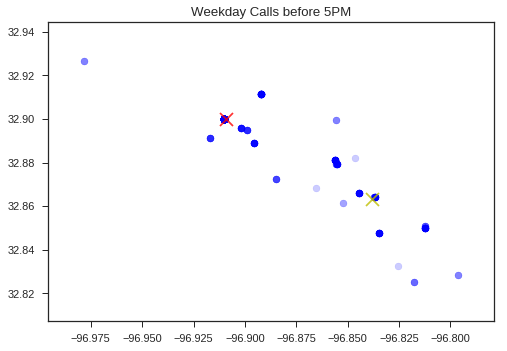

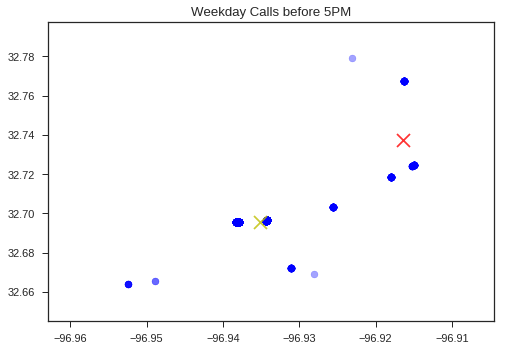

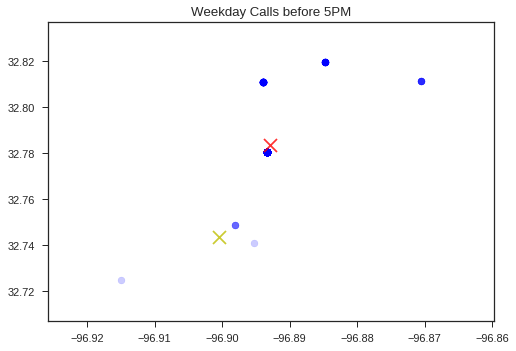

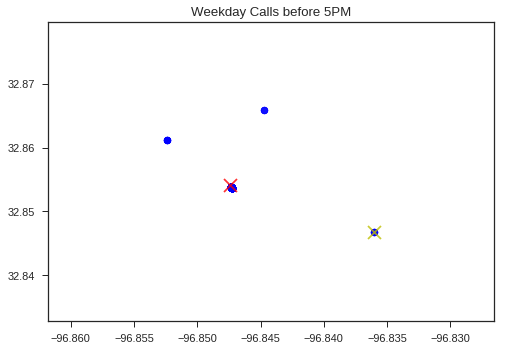

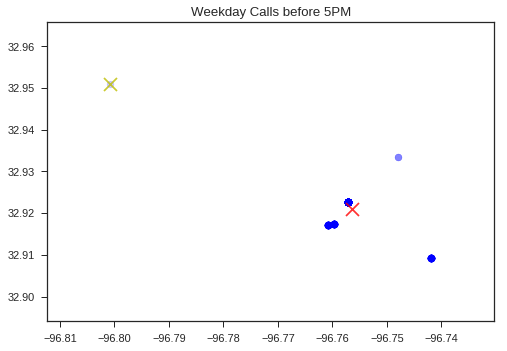

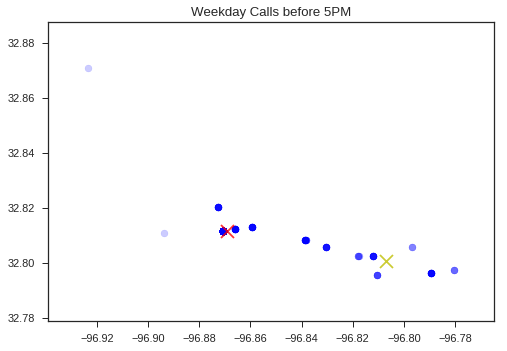

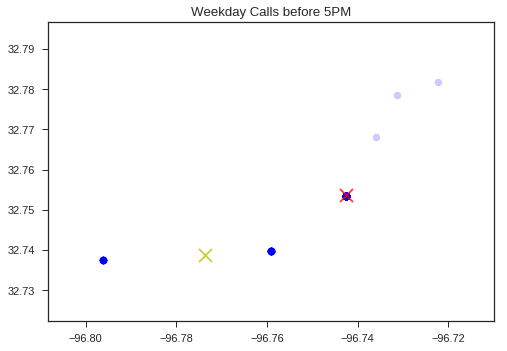

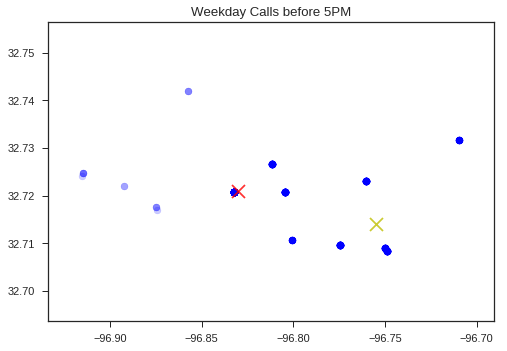

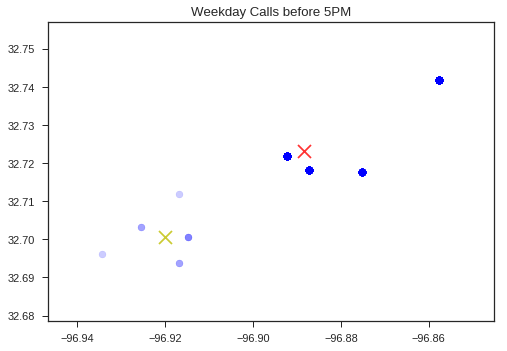

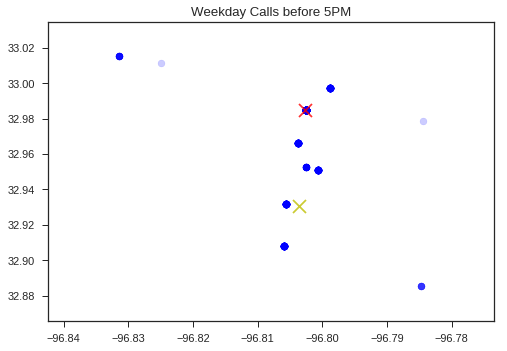

In [21]:
locations = []

for i in range(len(distinct_callers)):
               
               user = df[(df['In'] == distinct_callers[i])]
               
               print('\n\nExamining phone number: ', distinct_callers[i],' caller: ', i + 1)

              # create df from slice that includes only weekends (sat/sun).
               weekend_calls = user[(user.DOW == 'Sat') | (user.DOW == 'Sun')]

              # Create df from slice that includes only calls between midnight and 0600 on weekends
               twilight_weekends = weekend_calls[(weekend_calls.CallTime < "06:00:00") | (weekend_calls.CallTime > "24:00:00")]  

              # eliminate weekend calls
               weekday_calls = user[(user.DOW != 'Sat') & (user.DOW != 'Sun')]

              # eliminate calls after 1700
               weekday_five = weekday_calls[(weekday_calls.CallTime > '07:30:00') & (weekday_calls.CallTime < '17:00:00')]

               model = do_K_Means(weekday_five, 2)	

               least_cluster = cluster_samples(model)[0]

               most_cluster = cluster_samples(model)[1]

               print("Centroid Index with Least Samples: ", least_cluster)

               print("Centroid Index with Most Samples: ", most_cluster)

              #label indices of calls from centroid with least samples
               least_sample_index_array = np.where(model.labels_ == cluster_samples(model)[0])[0]

              #label indices of calls from centroid with most samples
               most_sample_index_array = np.where(model.labels_ == cluster_samples(model)[1])[0]

              # user weekday calls made between 0730 and 1700 associated with centroid of least samples
               least_centroid_samples = weekday_five.loc[weekday_five.index[[least_sample_index_array]], :]

              # user weekday calls made between 0730 and 1700 associated with centroid of most samples
               most_centroid_samples = weekday_five.loc[weekday_five.index[[most_sample_index_array]], :]

               print("Least Samples Centroid's Mean Call Time", least_centroid_samples['CallTime'].mean())
              
               print("Most Samples Centroid's Mean Call Time", most_centroid_samples['CallTime'].mean())
                
               clusterInfo(model)
                
               fig = plt.figure()
               ax = fig.add_subplot(111)
               ax.scatter(x = weekday_five.TowerLon, y = weekday_five.TowerLat, c='Blue', marker='o', alpha=0.2)
               ax.set_title('Weekday Calls before 5PM')


               ax.scatter(model.cluster_centers_[0,1], model.cluster_centers_[0,0], s=169, c='r', marker='x', alpha=0.8, linewidths=2)
               ax.scatter(model.cluster_centers_[1,1], model.cluster_centers_[1,0], s=169, c='y', marker='x', alpha=0.8, linewidths=2)

### Just for fun...
can k-means predict the mobile phone numbers....

In [0]:
kmeans = KMeans(n_clusters=10)

df_lat_long = df[['TowerLat', 'TowerLon']]

kmeans.fit(df_lat_long)

phone_kmeans = kmeans.predict(df_lat_long)

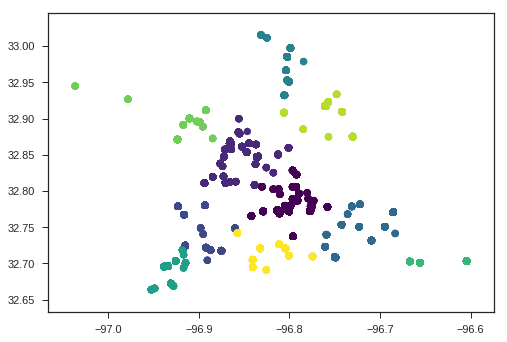

In [23]:
plt.scatter(df.loc[:, 'TowerLon'], df.loc[:, 'TowerLat'], c = phone_kmeans, s=50, cmap='viridis')